# Week 5. Linear regression

## 0. Load data

In [1]:
import numpy as np
import pandas as pds

data = pds.read_csv('../files/Week 03. supplement/regression_dataset.csv', header = None)

data = data.rename(
    columns = {
        i : f'feature_{i}' if n < len(data.columns) - 1 else 'target' for n,i in enumerate(data.columns)
    }
)

data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


## 1. Linear regression - Least Square Method
-----------------

$$y = f(x,\beta)$$

$$x = [1,x_{1},x_{2},\cdots,x_{k}]$$

$$\beta = [\beta_0, \beta_1, \beta_2, \cdots, \beta_k]$$
 

 
$\beta$는 $y_k$를 예측하기 위한, $x_k$의 가중치를 의미합니다. 

$$y  \approx x_{0} \beta_0 + x_{1} \beta_1 + x_{2} \beta_2 + \cdots + x_{k} \beta_k = \sum_{i=0}^{k} x_i \beta_i = x \beta  $$


proof) Least Square Method

$$e^2 = (y-x \beta )^2 $$

$$ \underset{\beta}{\mathrm{argmin}}\ e = \underset{\beta}{\mathrm{argmin}}\ (y-x \beta )^2 >= 0 $$
$$ {\partial e \over \partial \beta}  = -x^T y + x^T x \beta = 0 $$
$$ \therefore \beta = (x^T x)^{-1}x^T y $$
 --------------

In [2]:
x = data.drop(columns = 'target')
y = data.target

In [3]:
def linear_reg(x,y):
    xt_x = x.T @ x + sys.float_info.epsilon
    xt_x_inv = np.linalg.inv(xt_x)
    beta = xt_x_inv @ x.T @ y

    return beta

beta = linear_reg(x,y)
beta = beta.rename(
    index = {i:j for i,j in zip(beta.index, x.columns)}
)
for k,v in beta.items():
    print(f'{k}:\t {v:.4g}')

feature_0:	 -5.361e-07
feature_1:	 0.001709
feature_2:	 -0.0001928
feature_3:	 -1.249
feature_4:	 -113.3
feature_5:	 7.475
feature_6:	 209.8
feature_7:	 -13.89
feature_8:	 -131.4
feature_9:	 26.94
feature_10:	 0.1962
feature_11:	 -6.479e+13
feature_12:	 9.597
feature_13:	 11.1
feature_14:	 -21.09
feature_15:	 3.151
feature_16:	 6.479e+13
feature_17:	 -66.54
feature_18:	 -54.71
feature_19:	 115.7
feature_20:	 -7.852
feature_21:	 -238.9
feature_22:	 18.91
feature_23:	 143.5
feature_24:	 0.2437
feature_25:	 -1.56
feature_26:	 6.479e+13
feature_27:	 -7.015
feature_28:	 5.792
feature_29:	 -0.08608
feature_30:	 -2.494e+11
feature_31:	 2.494e+11
feature_32:	 0.00172
feature_33:	 2.494e+11
feature_34:	 -0.289
feature_35:	 -0.001911
feature_36:	 0.003473
feature_37:	 1.105e+20
feature_38:	 -6.275
feature_39:	 173.2
feature_40:	 175.2
feature_41:	 186.3
feature_42:	 181.1
feature_43:	 188.5
feature_44:	 184
feature_45:	 178.4
feature_46:	 -16.61
feature_47:	 -8.812
feature_48:	 -16.81
feature_49

## 2. Evaluation - Cross Validation

기계 학습의 목표는 우리가 수집하지 못한 데이터들을 성공적으로 예측하는 것 입니다. 

하지만, 우리는 미래에 수집될 데이터를 알 수 없습니다. 

따라서, 학습에 사용하는 데이터를 분할하여 주어진 데이터 중 일부를 검증용 데이터로 사용하는 교차 검증을 주로 사용합니다. 

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width="700"><br>
<center><b>Figure. Explain to cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)</b></center>



In [4]:
data.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_50', 'feature_51', 'feature_52', 'target'],
      dtype='object')

In [5]:
from sklearn.model_selection import KFold


def kfold_fn(data):
    kf = KFold()
    for n, (train_idx, valid_idx) in enumerate(kf.split(data)):
        print(n, valid_idx)
        train_x = data.iloc[train_idx, :len(data.columns)-1]
        valid_x = data.iloc[valid_idx][data.columns[:-1]]

        train_y = data.iloc[train_idx, -1]
        valid_y = data.iloc[valid_idx, -1]
        yield [train_x, train_y], [valid_x, valid_y]


In [6]:
betas = []
valid_y_hat = []
valid_y = []
for train_set, valid_set in kfold_fn(data):
    beta = linear_reg(*train_set)
    betas.append(beta)
    valid_y.append(valid_set[1])
    valid_y_hat.append(valid_set[0] @ beta.values)

0 [   0    1    2 ... 8187 8188 8189]
1 [ 8190  8191  8192 ... 16377 16378 16379]
2 [16380 16381 16382 ... 24567 24568 24569]
3 [24570 24571 24572 ... 32757 32758 32759]
4 [32760 32761 32762 ... 40946 40947 40948]


## 2. Evaluation - Metrics

$\beta$는 $x$의 각 변수에 가중치를 곱하여 $y$를 예측하고자 합니다. 

한편, 모델의 성능을 정량적으로 표현하는 것 또한 기계 학습에서 중요한 부분 중 하나입니다.

이번에는 $y$와 $\hat{y}$의 오차를 수치화 하여 계산하는 방법에 대해 실습해보겠습니다

1. Root Mean Squared Error

    $$RMSE=\sqrt{{1\over n} \sum^n_{j = 1} (y_j-\hat{y_j})^2} $$
    
    
2. Mean Absolute Error

    $$MAE={1\over n} \sum^n_{j = 1} |y_j-\hat{y_j}| $$
    
    
3. $R^2$

    $$R^2=1-{ SS_{res} \over SS_{tot} }$$
    
    $$SS_{res}=\sum_{j = 1} (y_j-\hat y_j)^2 = \sum_{j=1} e_j^2$$
    
    $$SS_{tot} = \sum_{j = 1} (y_j - \bar y_j)^2, \quad \bar {y_j}= {1\over n} \sum y_j $$
    


In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metric_df = pds.DataFrame(
    np.zeros((5, 3)),
    index = ['fold_'+str(i) for i in range(5)],
    columns = ['RMSE','MAE', 'R2']
)

for n, (yt, yp) in enumerate(zip(valid_y, valid_y_hat)):
    metric_df.iloc[n]['R2'] = r2_score(yt, yp)
    metric_df.iloc[n]['RMSE'] = mean_squared_error(yt, yp) ** .5
    metric_df.iloc[n]['MAE'] = mean_absolute_error(yt, yp)

metric_df

,RMSE,MAE,R2
fold_0,411.764489,65.834516,-106.768303
fold_1,1209.196857,251.819942,-1202.116779
fold_2,250.541870,101.335382,-41.899464
fold_3,137.146653,73.659491,-13.755982
fold_4,574.321778,218.246026,-430.151729


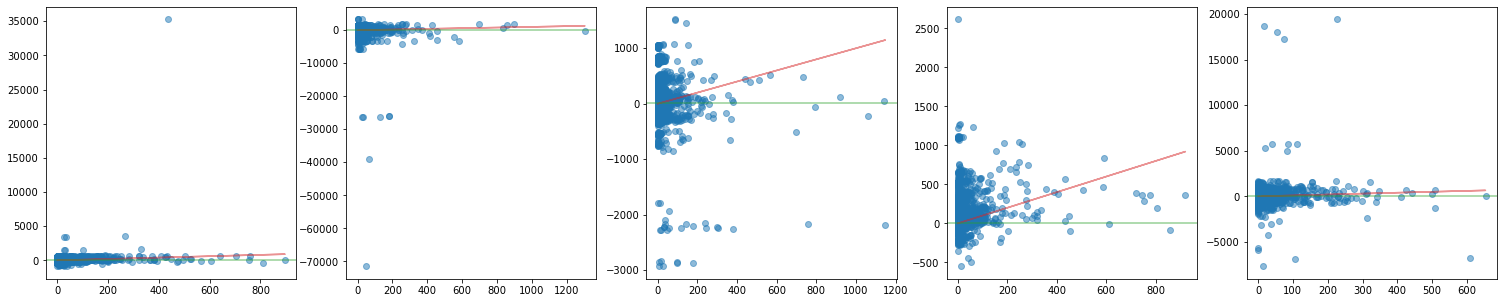

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,5, figsize = (26, 5))

for n, (yt, yp) in enumerate(zip(valid_y, valid_y_hat)):
    ax[n].scatter(yt, yp, alpha = .5)
    ax[n].plot(yt,yt, color = 'tab:red', alpha = .5)
    ax[n].axhline(yt.mean(), color = 'tab:green', alpha = .5)

## 3. Normalization

이론에 따르면 univariabte linear regression에 활용되는 parameter $\beta$는 $x$와 $y$간에 다음과 같은 관계를 갖습니다. 

$$y  \approx \beta_0 + x_{1} \beta_1 = x \beta  $$

위 식에 따르면, bias 역할을 하는 $\beta_0$는 아래와 같습니다. 

$$\frac{\partial{e}}{\partial{\beta_0}} = -2\sum_{i=1}^N y_i-\beta_0-\beta_1 x_i = 0 $$

$$ \sum_{i=1}^N y_i - \beta_1 \sum_{i=1}^N x_i = N \beta_0 \rightarrow \ \therefore \beta_0 = \frac{\sum_{i=1}^N y_i - \beta_1 \sum_{i=1}^N x_i}{N} = \bar{y} - \beta_1 \bar{x}$$

<!-- $$\frac{\partial{e}}{\partial{\beta_0}} = \bar{y} - \sum_{j=1}^k \bar{x}_j \beta_j  $$ -->

위 식은 $\beta_0$가 주어진 데이터의 변수별 평균에 의존적임을 보여줍니다. 

또한 $\beta_0$를 활용한 $\beta_1$은 다음과 같은 해를 같습니다. 

$$\frac{\partial{e}}{\partial{\beta_1}} = -2\sum_{i=1}^Nx_i( y_i-\beta_0-\beta_1 x_i ) = 0 $$

$$\therefore \beta_1 = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2} = \frac{  \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{N}}{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N}} = \frac{Cov(x,y)}{Var(x)}$$

따라서, 평균을 0으로 만들어주는 것은 모델의 bias를 작게 만들수 있는 방법입니다. 

또한, 분산을 1로 만들어 주는 것은 각 $\beta$가 순전히 $x$의 변화량에 대한 $y$의 변화량만을 반영할 수 있도록 도와줍니다. 

Gaussian 분포로 바꿔주는 standard scaling은 데이터의 평균과 분산을 바꿀 수 있는 좋은 방법 중 하나입니다. 

StandardScaler의 fit method는 scaler object에 주어진 데이터에 대한 평균과 분산을 저장합니다. 

그리고 transform method와 inverse_transform method들을 활용하여 평균과 분산을 활용한 스케일링을 적용합니다. 

In [11]:
from sklearn.preprocessing import StandardScaler



def ss_kfold_fn(data):
    kf = KFold()
    for n, (train_idx, valid_idx) in enumerate(kf.split(data)):
        
        scaler_x = StandardScaler()
        scaler_y = StandardScaler()
        
#         print(n, valid_idx)
        train_x = scaler_x.fit_transform(data.iloc[train_idx].drop(columns = 'target'))
        valid_x = scaler_x.transform(data.iloc[valid_idx].drop(columns = 'target'))

        train_y = scaler_y.fit_transform(data.iloc[train_idx]['target'].values.reshape(-1,1))
        valid_y = scaler_y.transform(data.iloc[valid_idx]['target'].values.reshape(-1,1))
        
        yield [
            [train_x, train_y],
            [valid_x, valid_y]
        ], (scaler_x, scaler_y)

        
def linear_reg(x,y):
    xt_dot_x = np.dot(x.transpose(), x)
    inverse_xt_dot_x = np.linalg.inv(xt_dot_x + 1e-7)
    beta = inverse_xt_dot_x @ x.transpose() @ y
    return beta
        
    
scalers = []
betas = []
valid_y_hat = []
valid_y = []
for (train_set, valid_set), scaler in ss_kfold_fn(data):
    scalers.append(scaler)
    beta = linear_reg(*train_set)
    betas.append(beta)
    valid_y.append(valid_set[1])
    valid_y_hat.append(valid_set[0] @ beta)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

scaled_metric_df = pds.DataFrame(
    np.zeros((5, 3)),
    index = ['fold_'+str(i) for i in range(5)],
    columns = ['RMSE','MAE', 'R2']
)

for n, (yt, yp, scaler) in enumerate(zip(valid_y, valid_y_hat, scalers)):
    scaler_y = scaler[1]
    
    yt = scaler_y.inverse_transform(yt)
    yp = scaler_y.inverse_transform(yp)
    
    scaled_metric_df.iloc[n]['R2'] = r2_score(yt, yp)
    scaled_metric_df.iloc[n]['RMSE'] = mean_squared_error(yt, yp) ** .5
    scaled_metric_df.iloc[n]['MAE'] = mean_absolute_error(yt, yp)

pds.concat([metric_df, scaled_metric_df], 1)

C:\Users\keb20\AppData\Local\Temp/ipykernel_21416/3510218115.py:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  pds.concat([metric_df, scaled_metric_df], 1)


,RMSE,MAE,R2,RMSE,MAE,R2
fold_0,411.764489,65.834516,-106.768303,191.146119,72.212185,-22.223316
fold_1,1209.196857,251.819942,-1202.116779,223.767700,80.169542,-40.201076
fold_2,250.541870,101.335382,-41.899464,34.250888,12.122115,0.198257
fold_3,137.146653,73.659491,-13.755982,64.619236,21.656993,-2.275830
fold_4,574.321778,218.246026,-430.151729,47.634442,18.660006,-1.965936


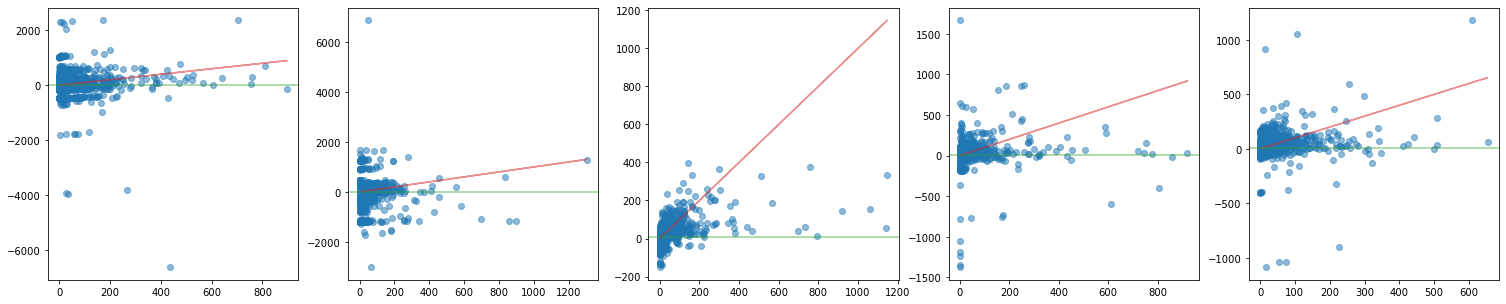

In [13]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,5, figsize = (26, 5))

for n, (yt, yp, scaler) in enumerate(zip(valid_y, valid_y_hat, scalers)):
    scaler_y = scaler[1]
    yt = scaler_y.inverse_transform(yt)
    yp = scaler_y.inverse_transform(yp)
    
    ax[n].scatter(yt, yp, alpha = .5)
    ax[n].plot(yt,yt, color = 'tab:red', alpha = .5)
    ax[n].axhline(yt.mean(), color = 'tab:green', alpha = .5)

## 4. Regularization

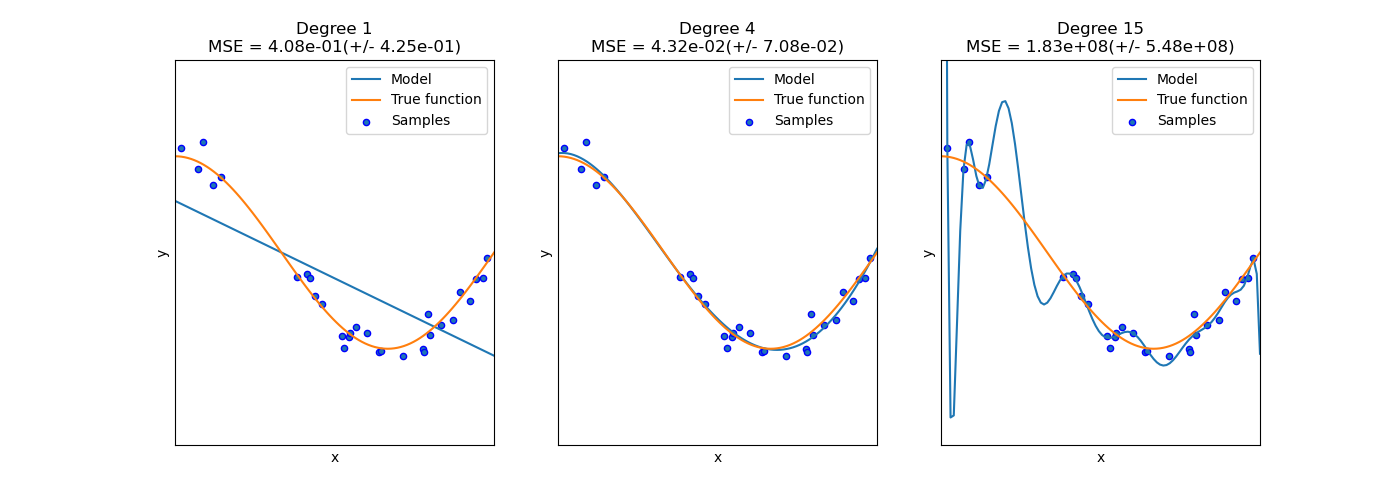
<br>
<center><b> Examples of Under-Fitting & Over-Fitting</b></center>



Regularization은 $\beta$의 특정 변수를 위한 가중치가 극단적으로 커지는 것을 방지하는 방법을 가리킵니다.

$$ \mathcal{L}^n(\beta) = \sum_{i=1}^{N} (y_i-x_i \beta )^2 + \lambda ||\beta||^n$$

$n=1$인 경우를 lasso regularization, 2인 경우를 ridge regularization라고 부릅니다

Lasso와 ridge regression은 sklearn의 linear에 포함되어있는 class로 사용할 수 있습니다

$\lambda$의 변화에 따라 $\beta$가 어떤식으로 변하는지, 그리고 변화된 $\beta$에 따른 성능은 어떻게 변하는지 확인해보겠습니다

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import gc; gc.enable()


In [15]:

logger = dict()
for n, (train_set, valid_set), scaler in ss_kfold_fn(data):
    
    logger[n] = dict()
    
    logger[n]['y_train'] = scaler[1].inverse_transform(
        train_set[1].reshape(-1,1)
    )
    
    logger[n]['y_val'] = scaler[1].inverse_transform(
        valid_set[1].reshape(-1,1)
    )
    
    linear = LinearRegression()
    linear.fit(*train_set)
    logger[n]['linear'] = linear
    logger[n]['y_linear'] = scaler[1].inverse_transform(
        linear.predict(valid_set[0]).reshape(-1,1)
    )

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
d_lasso = 1e-3  ## lasso hyper parameter에 따라 제약걸린 파라미터 연산으로 인해 결과가 바뀌게 됩니다. 
d_lasso_range = np.arange(d_lasso, d_lasso * 11, d_lasso)

for n, (train_set, valid_set), scaler in ss_kfold_fn(data):
    
    lassos = []
    lassos_preds = []
    for lasso_lambda in d_lasso_range:
        lasso = Lasso(lasso_lambda)
        lasso.fit(*train_set)
        lassos_preds.append(''' lasso.predict를 시행하고 스케일을 복구한 후 기록되도록 코드를 작성해주세요''')
        lassos.append(lasso)
        
    logger[n]['lasso'] = lassos
    logger[n]['y_lasso'] = lassos_preds

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.557e+00, tolerance: 3.276e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
d_ridge = 1e1
d_ridge_range = np.arange(d_ridge, d_ridge * 11, d_ridge)

for n, (train_set, valid_set), scaler in ss_kfold_fn(data):
    
    ridges = []
    ridges_preds = []
    for ridge_lambda in d_ridge_range:
        ridge = Ridge(ridge_lambda)
        ridge.fit(*train_set)
        ridges_preds.append(''' ridge.predict를 시행하고 스케일을 복구한 후 기록되도록 코드를 작성해주세요''')
        ridges.append(ridge)
        
    logger[n]['ridge'] = ridges
    logger[n]['y_ridge'] = ridges_preds
    

#### 하이퍼 파라미터에 따른 lasso 및 ridge의 예측 성능 변화 

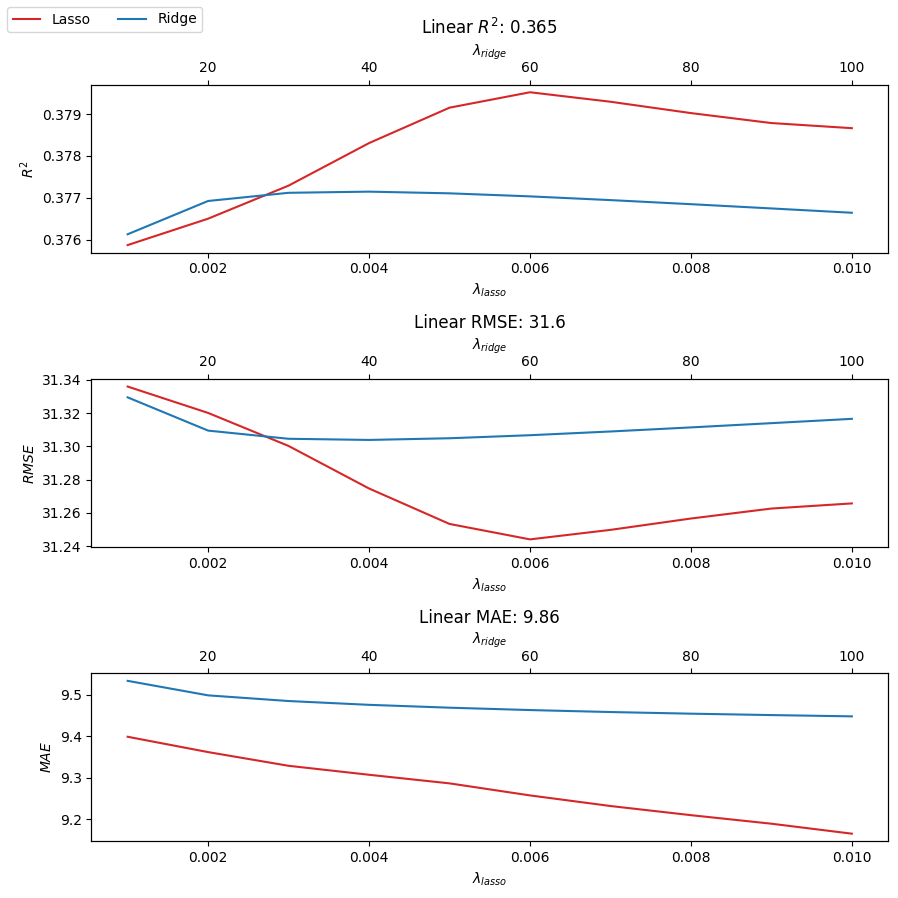

In [ ]:
import matplotlib as MP

fig, axes = plt.subplots(3,1,figsize = (9,9))
n = 0


r2s_lasso = [r2_score(logger[n]['y_val'], yr) for yr in logger[n]['y_lasso']]
r2s_ridge = [r2_score(logger[n]['y_val'], yr) for yr in logger[n]['y_ridge']]

axes[0].plot(d_lasso_range, r2s_lasso, color = 'tab:red')
tax = axes[0].twiny()
tax.plot(d_ridge_range, r2s_ridge, color = 'tab:blue')
axes[0].set_xlabel('$\lambda_{lasso}$')
axes[0].set_ylabel('$R^2$')
tax.set_xlabel('$\lambda_{ridge}$')
linear_r2 = r2_score(logger[n]['y_val'], logger[n]['y_linear'])
axes[0].set_title(f'Linear $R^2$: {linear_r2:.3g}')

rmses_ridge = [mean_squared_error(logger[n]['y_val'], yr)**.5 for yr in logger[n]['y_ridge']]
rmses_lasso = [mean_squared_error(logger[n]['y_val'], yr)**.5 for yr in logger[n]['y_lasso']]

axes[1].plot(d_lasso_range, rmses_lasso, color = 'tab:red')
tax = axes[1].twiny()
tax.plot(d_ridge_range, rmses_ridge, color = 'tab:blue')
axes[1].set_xlabel('$\lambda_{lasso}$')
axes[1].set_ylabel('$RMSE$')
tax.set_xlabel('$\lambda_{ridge}$')
linear_rmse = mean_squared_error(logger[n]['y_val'], logger[n]['y_linear']) ** .5
axes[1].set_title(f'Linear RMSE: {linear_rmse:.3g}')

maes_ridge = [mean_absolute_error(logger[n]['y_val'], yr) for yr in logger[n]['y_ridge']]
maes_lasso = [mean_absolute_error(logger[n]['y_val'], yr) for yr in logger[n]['y_lasso']]

a1 = axes[2].plot(d_lasso_range, maes_lasso, color = 'tab:red')
tax = axes[2].twiny()
a2 = tax.plot(d_ridge_range, maes_ridge, color = 'tab:blue')
axes[2].set_xlabel('$\lambda_{lasso}$')
axes[2].set_ylabel('$MAE$')
tax.set_xlabel('$\lambda_{ridge}$')
linear_mae = mean_absolute_error(logger[n]['y_val'], logger[n]['y_linear'])
axes[2].set_title(f'Linear MAE: {linear_mae:.3g}')

fig.legend(
    [
        MP.patches.mlines.Line2D([],[], color = 'tab:red'),
        MP.patches.mlines.Line2D([],[], color = 'tab:blue')
    ],
    ['Lasso','Ridge'],
    loc = 'upper left', ncol = 2
)
fig.tight_layout()

#### 하이퍼 파라미터에 따른 lasso 및 ridge의 $\beta$ 변화

Text(0, 0.5, '$\\beta_{ridge}$')

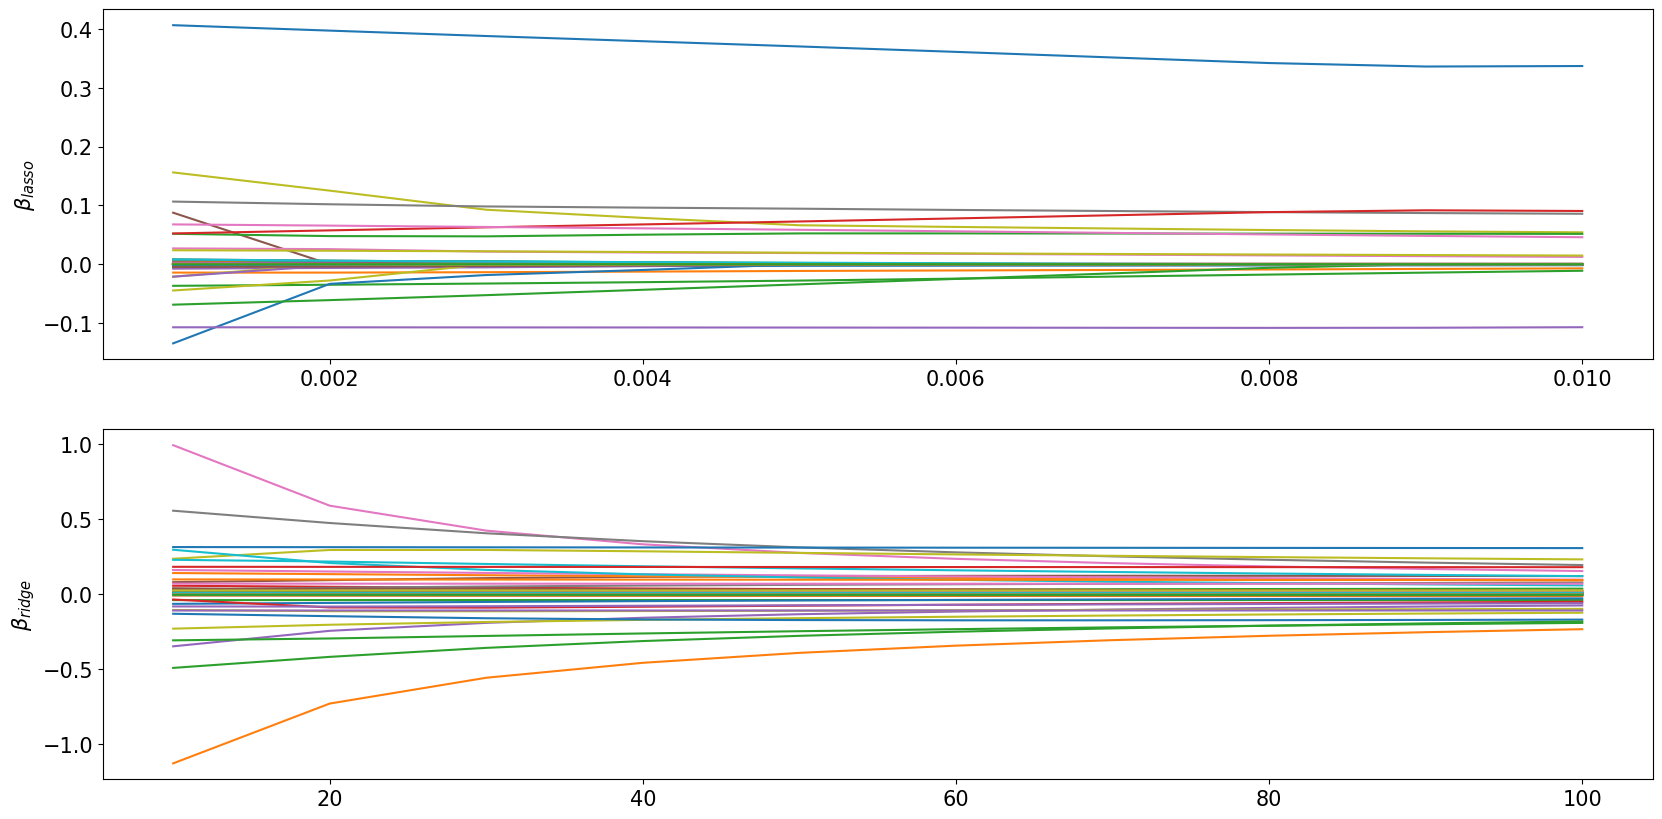

In [ ]:
ridge_coeffs = [r.coef_[0] for r in logger[n]['ridge']]
lasso_coeffs = [r.coef_ for r in logger[n]['lasso']]

plt.rcParams['font.size'] = 15

fig,ax = plt.subplots(2,1,figsize = (20, 10))
for rcoef, lcoef in zip(
    np.stack(ridge_coeffs).transpose(),
    np.stack(lasso_coeffs).transpose(),
):
    ax[0].plot(d_lasso_range, lcoef)
    ax[1].plot(d_ridge_range, rcoef)
ax[0].set_ylabel(r"$\beta_{lasso}$")
ax[1].set_ylabel(r"$\beta_{ridge}$")